In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal

In [2]:
%matplotlib inline

In [3]:
def get_orthogonal_line(current_points,new_x_coords,center):
    '''
    assumes 2D
    Return two points that are ortho
    '''
    x1, y1 = current_points[0]
    x2, y2 = current_points[1]
    
    m =  (y2 - y1) / (x2 - x1)
    
    perp_m = -1.0* (1 / float(m))
    
    b = center[1] - perp_m*center[0] # from y = mx + b

    x_new_1 = perp_m * new_x_coords[0] + b
    
    x_new_2 = perp_m * new_x_coords[1] + b
    
    return [x_new_1,x_new_2]

## Introduction to Learning with Kernels

In these series of publications I plan on looking at statistical learning from the perspective of support vector (SV) learning.  The main source for this series which I will reference later is the book “Learning with Kernels”. I also found sources from the center for brains minds + machines helpful.

Helpful Sources

    0. Book homepage: http://agbs.kyb.tuebingen.mpg.de/lwk/
    
    1. CBMM: https://cbmm.mit.edu/

    2. The MIT course: http://www.mit.edu/~9.520/fall17/

    3. CBMM MIT Summer course:
    https://ocw.mit.edu/resources/res-9-003-brains-minds-and-machines-summer-course-summer-2015/

### Intro to the problem of learning

Starting with the extremely simple we can formulate a problem that every system that is capable of learning should be able to do. That is to learn to differentiate between different objects. The simplest version of this problem is if we have two types of objects. Not only do we want to be able to differentiate between the objects that we currently see or have seen we want to be able to be given a new object and successfully place that object in one of the two known categories

To formalize the problem a bit you might have the following data

$ (x_1,y_1),...,(x_m,y_m) $ 

where $ x_m \epsilon $ $ \mathcal{X} $ (some set ) and $ y_m $ can take the value of +1 or -1

$ \mathcal{X} $ really can be a set of anything like an image or text or a number or whatever else. 

Now what to do when you are given a new data point $ x_{m + 1} $ ? We would like to correctly assign it to the correct label $ y_{m + 1} $ In words a good way to go about this would be to answer the question given the set of previous data I have seen what data points is my new point $ x_{m + 1} $ most similar to? If you can answer that question accuratley you have solved the problem. This is a core problem in machine learning in general. 

To formalize that desire we want to find the following function
$ k: \mathcal{X} \; x \; \mathcal{X} \rightarrow {\mathbb{R}} $
That is we want a function that takes in two object and returns a real number that is an accurate similarity measure between the two object. We call this function a kernel and it is this function that we will be looking into in more depth throught this publication

If we knew all our input data to be vectors we could use a dot product for this kernel function. A dot product is a simple type of similarity measure. It returns the number 1 when two vectors are the same and it returns 0 when two vectors are tangential to one another. We cannot however use a dot product when we are dealing with non numeric object and will therfore need to a way to represent an object as a vector. If we can do this we can use the dot product between two objects in this new representation as our similarity measure. That is we want to find $ \phi: \mathcal{X} \rightarrow \mathbb{H} $. That is we want to find a function $ \phi: $ that can take in object and return a vector is a dot product space $ \mathbb{H} $

From what we have discussed so far let us look at a simple example to illustrate what we hope to achieve. 

In [11]:
#####################
# Generate some data
#####################

n_m = 20 # number minus
n_p = 20 # number plus
n = n_m + n_p
# set mean and covariance for both samples
mean_p = [3,1]
cov_p = [[1,0],[0,2]]
mean_m = [-2,1]
cov_m = [[1,0],[0,2]]

x_p =multivariate_normal(mean_p,cov_p,size=n_p)
x_m =multivariate_normal(mean_m,cov_m,size=n_m)

x_p_1,x_p_2 = zip(*x_p)
x_m_1,x_m_2 = zip(*x_m)

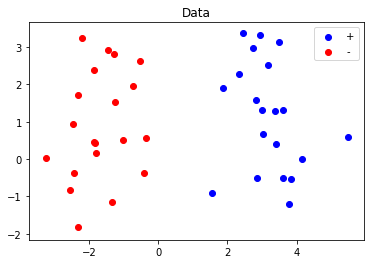

In [12]:
###################################################
# Take a look at the data we have generated
###################################################
colors = ('blue','red')
groups = ('+','-')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_p_1,x_p_2,color='blue',label='+')
ax.scatter(x_m_1,x_m_2,color='red',label='-')
plt.title('Data')
plt.legend()

We have generated some simple data from two different guassin distributions. One with mean at (3,1) The other at mean (-2,1). Each containg 20 points. The two different distributions have been color coded seperatley. We can see that its easy to 'learn' what its like to be from the blue distribution and what its like to be from the red distribution. If someone gives us a new point we can easily tell them if it should be labled blue or red.  

We could try to formalize this a bit more. We want to find the function $ f: {\mathcal{X}} \rightarrow [{blue,red}] $ That is that takes in an object and returns the correct label. Intuitively you can imagine drawing a straight line between the points and that becomes your rule. Anything that lies on the left side of that line you assign to red (-1). Anything that lies on the right side you assign to blue (+ 1). 

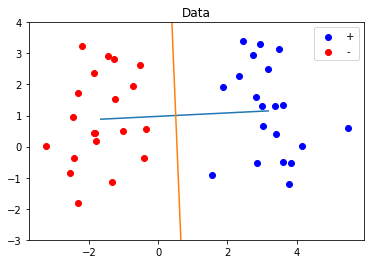

In [21]:
c_p = np.mean(x_p,axis=0)
c_m = np.mean(x_m,axis=0)
b = (np.sqrt(np.dot(c_m,c_m)) - np.sqrt(np.dot(c_p,c_p))) / 2.0
c_p_x , c_p_y = c_p[0] , c_p[1]
c_m_x , c_m_y = c_m[0] , c_m[1]
centerx = c_p_x /2.0 + c_m_x / 2.0
centery = c_p_y /2.0 + c_m_y / 2.0
ortho_points = get_orthogonal_line([tuple(c_m),tuple(c_p)],[0,3],(centerx,centery))
colors = ('blue','red')
groups = ('+','-')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_p_1,x_p_2,color='blue',label='+')
ax.scatter(x_m_1,x_m_2,color='red',label='-')
ax.plot([c_p_x,c_m_x],[c_p_y,c_m_y])
ax.plot([0,2],ortho_points)
plt.ylim(-3,4)
plt.title('Data')
plt.legend()

We can think of the function that we want to come up with as forming a decision boundary. If we have the correct line that seperates the two sets of points than we have the function we want. The image above illustrates this point. The vertical line is our decesion boundary. The procedure is straightforward. We first calculate the means of each one of our distributions and than plot the line between them. That is the horizontal line as shown above. Than our decesion boundary is given by the line that is perpendicular to that horizonal one.  